# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
total_sales = data['RetailSales'].groupby(data['ItemType']).sum()
total_sales

ItemType
BEER            209763.11
DUNNAGE              0.00
KEGS                 0.00
LIQUOR          309847.85
NON-ALCOHOL       8109.97
REF                281.34
STR_SUPPLIES       995.98
WINE            313400.42
Name: RetailSales, dtype: float64

In [4]:
total_transfers = data['RetailTransfers'].groupby(data['ItemType']).sum()
total_transfers

ItemType
BEER            234924.44
DUNNAGE              0.00
KEGS                 0.00
LIQUOR          334176.41
NON-ALCOHOL       9058.37
REF                171.92
STR_SUPPLIES      3594.70
WINE            340710.51
Name: RetailTransfers, dtype: float64

In [5]:
total_warehouse = data['WarehouseSales'].groupby(data['ItemType']).sum()
total_warehouse

ItemType
BEER            2437617.32
DUNNAGE          -45331.00
KEGS              43558.00
LIQUOR            33173.32
NON-ALCOHOL        8656.72
REF               -6754.00
STR_SUPPLIES          0.00
WINE             433009.47
Name: WarehouseSales, dtype: float64

In [6]:
total = total_sales + total_transfers + total_warehouse
total

ItemType
BEER            2882304.87
DUNNAGE          -45331.00
KEGS              43558.00
LIQUOR           677197.58
NON-ALCOHOL       25825.06
REF               -6300.74
STR_SUPPLIES       4590.68
WINE            1087120.40
dtype: float64

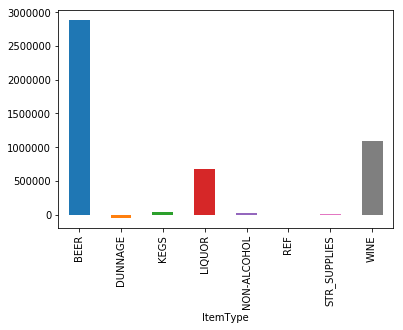

In [7]:
total.plot(kind='bar')

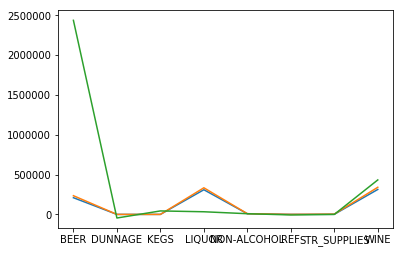

In [8]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(total_sales)
ax1.plot(total_transfers)
ax1.plot(total_warehouse)

In [9]:
total_sales

ItemType
BEER            209763.11
DUNNAGE              0.00
KEGS                 0.00
LIQUOR          309847.85
NON-ALCOHOL       8109.97
REF                281.34
STR_SUPPLIES       995.98
WINE            313400.42
Name: RetailSales, dtype: float64

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

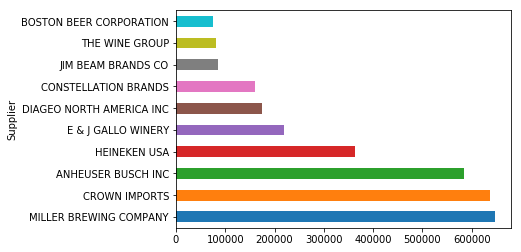

In [10]:
rs = data.groupby('Supplier')['RetailSales'].sum()
rt = data.groupby('Supplier')['RetailTransfers'].sum()
ws = data.groupby('Supplier')['WarehouseSales'].sum()

rs_rt_ws = rs + rt + ws

rs_rt_ws.sort_values(ascending=False).nlargest(n=10).plot(kind='barh')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

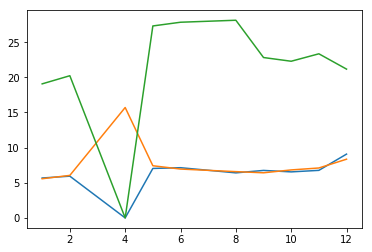

In [11]:
a = data.groupby('Month')['RetailSales'].mean()
b = data.groupby('Month')['RetailTransfers'].mean()
c = data.groupby('Month')['WarehouseSales'].mean()


plt.plot(a)
plt.plot(b)
plt.plot(c)

In [12]:
new = pd.concat([a,b,c], axis=1)
new.head()

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069


## 4. Plot the same information as above but as a bar chart.

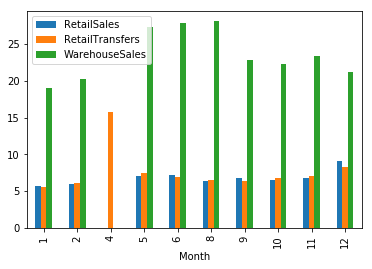

In [14]:
new.plot(kind='bar')

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [31]:
data.groupby(['Year','Month','ItemType'])['RetailSales'].sum()

Year  Month  ItemType    
2017  4      BEER                0.00
             LIQUOR              0.00
             NON-ALCOHOL         0.00
             REF                 0.00
             STR_SUPPLIES        0.00
             WINE                0.00
      5      BEER            25023.24
             LIQUOR          35123.36
             WINE            34546.89
      6      BEER            27863.26
             DUNNAGE             0.00
             KEGS                0.00
             LIQUOR          35035.31
             NON-ALCOHOL      1209.23
             REF                30.60
             STR_SUPPLIES       89.22
             WINE            33129.64
      8      BEER            23030.13
             DUNNAGE             0.00
             KEGS                0.00
             LIQUOR          32186.04
             NON-ALCOHOL      1091.28
             REF                19.54
             STR_SUPPLIES       77.34
             WINE            30707.45
      9      BEER       

In [46]:
jp = pd.DataFrame(new2)
jp.head()

RetailSales
Year Month ItemType                 
2017 4     BEER                  0.0
           LIQUOR                0.0
           NON-ALCOHOL           0.0
           REF                   0.0
           STR_SUPPLIES          0.0

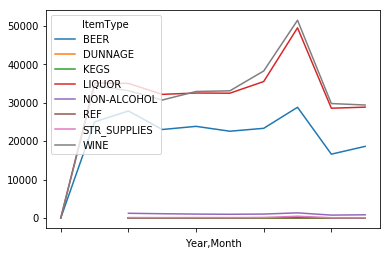

In [52]:
data.groupby(['Year','Month','ItemType']).sum().unstack()['RetailSales'].plot()

## 6. Plot the same information as above but as a bar chart.

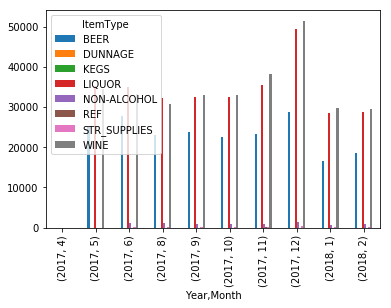

In [53]:
data.groupby(['Year','Month','ItemType']).sum().unstack()['RetailSales'].plot(kind='bar')

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [55]:
tips = sns.load_dataset("data")
sns.scatterplot(x=data.groupby('ItemType')['RetailSales'], y=data.groupby('ItemType')['RetailTransfers'], data=tips)

HTTPError: HTTP Error 404: Not Found

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*